In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

The data used in the textbook examples is not availbale so I am using a different csv file.

In [2]:
data = pd.read_excel('P_Data_Extract_From_World_Development_Indicators.xlsx')

In [3]:
print('Column names:', data.columns)

Column names: Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', '1963 [YR1963]',
       '1964 [YR1964]', '1965 [YR1965]', '1966 [YR1966]', '1967 [YR1967]',
       '1968 [YR1968]', '1969 [YR1969]', '1970 [YR1970]', '1971 [YR1971]',
       '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]',
       '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]',
       '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]',
       '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]',
       '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]',
       '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]',
       '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2

In [4]:
print('No. of rows, columns:', data.shape)

No. of rows, columns: (537, 61)


In [5]:
nb_countries = data['Country Name'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 269


In [6]:
central_govt_debt = data.loc[data['Series Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Series Name']=='Military expenditure (% of GDP)']

In [7]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:',military_exp.shape)

Shape of central_govt_debt: (266, 61)
Shape of military_exp: (266, 61)


In [8]:
central_govt_debt['2010 [YR2010]'].describe()

count     266
unique     74
top        ..
freq      192
Name: 2010 [YR2010], dtype: object

In [9]:
military_exp['2010 [YR2010]'].describe()

count     266
unique    192
top        ..
freq       72
Name: 2010 [YR2010], dtype: object

In [10]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

In [11]:
central_govt_debt_2010 = central_govt_debt['2010 [YR2010]'].dropna()
military_exp_2010 = military_exp['2010 [YR2010]'].dropna()



In [12]:
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1)


In [13]:
data_to_plot.columns = ['central_govt_debt', 'military_exp']
data_to_plot['central_govt_debt'].replace('..', np.nan, inplace=True)
data_to_plot['military_exp'].replace('..', np.nan, inplace=True)
data_to_plot.dropna(subset=['central_govt_debt'], inplace=True)
data_to_plot.dropna(subset=['military_exp'], inplace=True)

In [14]:
data_to_plot.head(10)

,central_govt_debt,military_exp
Country Code,,
AUS,28.670102,1.856791
AUT,85.786270,0.821233
AZE,6.385576,2.791004
BLR,18.905246,1.341383
BEL,93.206454,1.084633
BLZ,64.425453,1.113671
BWA,21.886297,2.726859
BRA,61.318780,1.539407
BGR,20.591865,1.652468


In [15]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]

In [16]:
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
AUS,28.670102,1.856791
AUT,85.786270,0.821233
AZE,6.385576,2.791004
BLR,18.905246,1.341383
BEL,93.206454,1.084633


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Military expenditure (% of GDP) of 85 countries in 2010')

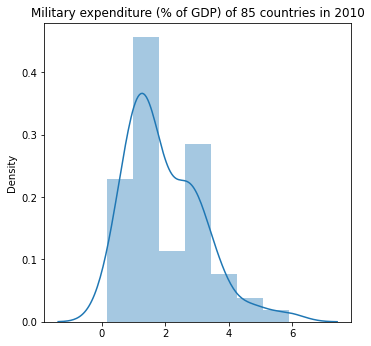

In [17]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010')


Text(0.5, 1.0, 'Military expenditures & Debt of central governments in 2010')

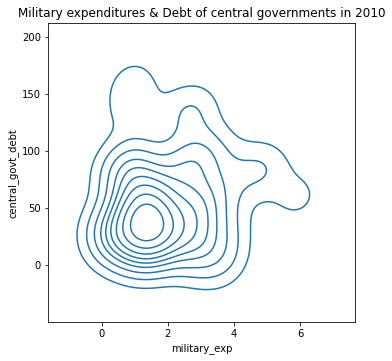

In [18]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot.military_exp, y=data_to_plot.central_govt_debt)
g.set_title('Military expenditures & Debt of central governments in 2010')


In [62]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

In [63]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)

In [67]:
index0 = np.where(data_us.index=='1960 [YR1960]')
index1 = np.where(data_us.index=='2010 [YR2010]')
print(index1)

(array([54], dtype=int64),)


In [68]:
data_us = data_us.iloc[4 : 54 ,:]
data_us.head()

Country Code,USA,USA
1960 [YR1960],8.993125,..
1961 [YR1961],9.156032,..
1962 [YR1962],9.331673,..
1963 [YR1963],8.831891,..
1964 [YR1964],8.051281,..


In [69]:
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']

In [49]:
data_us.head(30)

,Federal Military Expenditure,Debt of Federal Government
1960 [YR1960],8.993125,..
1961 [YR1961],9.156032,..
1962 [YR1962],9.331673,..
1963 [YR1963],8.831891,..
1964 [YR1964],8.051281,..
1965 [YR1965],7.587247,..
1966 [YR1966],8.4353,..
1967 [YR1967],9.417796,..
1968 [YR1968],9.268454,..
1969 [YR1969],8.633264,..


In [70]:
#There are null rows for several years possibly due to unavailability of data for these years
data_us.replace('..', np.nan, inplace=True)
data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

Shape of data_us: (21, 2)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-70-2d6bb6b6a0a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_us.dropna(inplace=True)


In [71]:
#First 20 rows of data_us after dropping rows with missing values
data_us.head(20)

,Federal Military Expenditure,Debt of Federal Government
1989 [YR1989],5.871206,39.128400
1990 [YR1990],5.605175,40.933944
1991 [YR1991],4.883429,44.061597
1992 [YR1992],4.970467,46.050144
1993 [YR1993],4.604350,48.246140
1994 [YR1994],4.215265,47.353482
1995 [YR1995],3.860246,47.209535
1996 [YR1996],3.554982,46.741769
1997 [YR1997],3.405562,44.117470
1998 [YR1998],3.201558,41.129149


<AxesSubplot:title={'center':'Debt of Federal Government during 1988-2010 (% of GDP)'}>

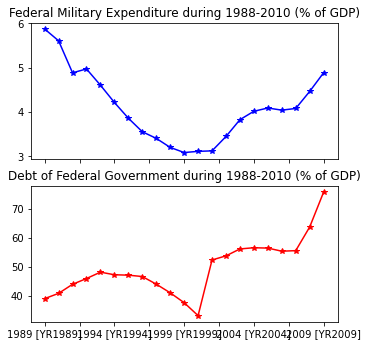

In [72]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])


In [132]:


central_govt_debt = data.loc[data['Series Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Series Name']=='Military expenditure (% of GDP)']


chn=military_exp.loc[military_exp['Country Code']=='CHN', :]

chn = pd.Series(data=chn.values[0], index=chn.columns)
chn.replace('..',np.nan, inplace=True)
chn.dropna(inplace=True)



usa=military_exp.loc[military_exp['Country Code']=='USA', :]
usa = pd.Series(data=usa.values[0], index=usa.columns)
usa.replace('..',np.nan, inplace=True)
usa.dropna(inplace=True)



ind=military_exp.loc[military_exp['Country Code']=='IND', :]
ind = pd.Series(data=ind.values[0], index=ind.columns)
ind.replace('..',np.nan, inplace=True)
ind.dropna(inplace=True)

gbr=military_exp.loc[military_exp['Country Code']=='GBR', :]
gbr = pd.Series(data=gbr.values[0], index=gbr.columns)
gbr.replace('..',np.nan, inplace=True)
gbr.dropna(inplace=True)


display(usa)

Country Name                       United States
Country Code                                 USA
Series Name      Military expenditure (% of GDP)
Series Code                    MS.MIL.XPND.GD.ZS
1960 [YR1960]                           8.993125
                              ...               
2012 [YR2012]                           4.477401
2013 [YR2013]                           4.046679
2014 [YR2014]                           3.695895
2015 [YR2015]                           3.477845
2016 [YR2016]                           3.413464
Length: 61, dtype: object

([<matplotlib.axis.XTick at 0x1f3d6009250>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

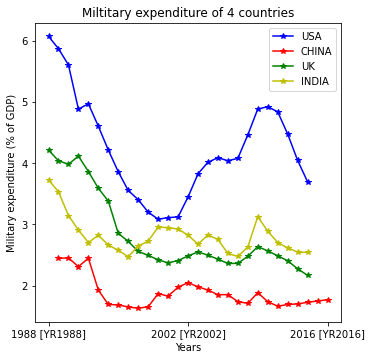

In [146]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(usa.iloc[32:59],linestyle='-', marker='*', color='b')
plt.plot(chn.iloc[4:59],linestyle='-', marker='*', color='r')
plt.plot(gbr.iloc[32:59],linestyle='-', marker='*', color='g')
plt.plot(ind.iloc[32:59],linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA'], loc=1)
plt.title('Miltitary expenditure of 4 countries')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years')
plt.xticks([0, 14, 28])